# Sentiment analysis on quote tweets
Author: Daheng Wang  
Last modified: 2017-09-11

# Roadmap
1. Build collections for quote tweets and retweets of quote tweets
2. Perform sentiment analysis on quote tweets (original/comment)
3. Plot sentiment scores of quote tweets (original/comment)
4. Plot user influence by quote/native tweets
5. Plot user influence by differnet sentiments in quote tweets

# Steps

In [1]:
"""
Initialization
"""

'''
Data analysis modules: pandas, matplotlib, numpy, and etc.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Standard modules, MongoDB modules
'''
import os, sys, json, datetime, pickle, multiprocessing, logging
from pprint import pprint

import pymongo
from pymongo import IndexModel, ASCENDING, DESCENDING

'''
Custom tool modules
'''
import mongodb  # module for setting up connection with (local) MongoDB database
import multiprocessing_workers  # module for splitting workloads between processes
import utilities  # module for various custom utility functions
from config import * # import all global configuration variables

'''
Misc
'''
NB_NAME = '20170911-quote_tweets_sentiment'

## Build collections for quote tweets and retweets of quote tweets

In [3]:
%%time
"""
Filter out quote tweets into a new collection

Register TW_NT_QT_COL = 'tw_nt_qt' in config first
"""
if 0 == 1:
    tw_nt_col = mongodb.initialize(DB_NAME, TW_NT_COL)
    
    match_dict = {'$match': {'quoted_status': {'$exists': True}}}

    out_dict = {'$out': TW_NT_QT_COL}

    ppl_lst = [match_dict, out_dict]

    tw_nt_col.aggregate(pipeline=ppl_lst)

MongoDB on localhost:27017/tweets_ek-2.tw_nt connected successfully!
CPU times: user 1.15 s, sys: 244 ms, total: 1.4 s
Wall time: 45min 32s


In [2]:
%%time
"""
Filter out retweets of quote tweets into a new collection

Register TW_RT_QT_COL = 'tw_rt_qt' in config first
"""
if 0 == 1:
    tw_rt_col = mongodb.initialize(DB_NAME, TW_RT_COL)
    
    match_dict = {'$match': {'retweeted_status.quoted_status': {'$exists': True}}}

    out_dict = {'$out': TW_RT_QT_COL}

    ppl_lst = [match_dict, out_dict]

    tw_rt_col.aggregate(pipeline=ppl_lst)

MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
CPU times: user 588 ms, sys: 192 ms, total: 780 ms
Wall time: 18min 55s


## Perform sentiment analysis on quote tweets (original/comment)

In [3]:
%%time
"""
Use multiprocessing to Perform sentiment analysis on quote tweets in 'text' and 'quoted_status.text' field
Worker function 'worker_qt_sentiment' is wrapped in multiprocessing_workers.py.
"""
if 0 == 1:
    procedure_name = 'qt_sentiment'
    multiprocessing.log_to_stderr(logging.DEBUG)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    jobs = []
    for batch_i in range(process_n):
        p = multiprocessing.Process(target=multiprocessing_workers.worker_qt_sentiment,
                                    args=(DB_NAME, TW_NT_QT_COL, batch_i, process_n, inter_files[batch_i]),
                                    name='Process-{}/{}'.format(batch_i, process_n))
        jobs.append(p)
    
    for job in jobs:
        job.start()
        
    for job in jobs:
        job.join()

[INFO/Process-0/11] child process calling self.run()
[INFO/Process-2/11] child process calling self.run()
[INFO/Process-1/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!


[INFO/Process-4/11] child process calling self.run()
[INFO/Process-3/11] child process calling self.run()
[INFO/Process-5/11] child process calling self.run()


Process0/11 handling documents 0 to 30078...
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!


[INFO/Process-6/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!


[INFO/Process-7/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!


[INFO/Process-8/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!


[INFO/Process-9/11] child process calling self.run()
[INFO/Process-10/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt connected successfully!
Process1/11 handling documents 30079 to 60157...
Process2/11 handling documents 60158 to 90236...
Process3/11 handling documents 90237 to 120315...
Process4/11 handling documents 120316 to 150394...
Process5/11 handling documents 150395 to 180473...
Process6/11 handling documents 180474 to 210552...
Process7/11 handling documents 210553 to 240631...
Process8/11 handling documents 240632 to 270710...
Process9/11 handling documents 270711 to 300789...
Process10/11 handling documents 300790 to 330876...


[INFO/Process-0/11] process shutting down
[DEBUG/Process-0/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-0/11] running the remaining "atexit" finalizers
[INFO/Process-0/11] process exiting with exitcode 0
[INFO/Process-1/11] process shutting down
[DEBUG/Process-1/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-1/11] running the remaining "atexit" finalizers
[INFO/Process-1/11] process exiting with exitcode 0
[INFO/Process-3/11] process shutting down
[DEBUG/Process-3/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-3/11] running the remaining "atexit" finalizers
[INFO/Process-3/11] process exiting with exitcode 0
[INFO/Process-2/11] process shutting down
[DEBUG/Process-2/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-2/11] running the remaining "atexit" finalizers
[INFO/Process-2/11] process exiting with exitcode 0
[INFO/Process-4/11] process shutting down
[DEBUG/Process-4/11] running all "atexit" 

CPU times: user 44 ms, sys: 220 ms, total: 264 ms
Wall time: 40.5 s


In [4]:
%%time
"""
Build a new collection for sentiment analysis scores of quote tweets
Register in config:
    TW_NT_QT_SENT_COL = 'tw_nt_qt_sent'
"""
if 0 == 1:
    procedure_name = 'qt_sentiment'
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)

    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    for inter_file in inter_files:
        print('Reading {}...'.format(inter_file), end=' ')
        lines = open(inter_file).readlines()
        parsed_jsons = [json.loads(line) for line in lines]
        
        print('Importing into {}.{}...'.format(DB_NAME, TW_RAW_TXT_KWS_TAG_COL))
        tw_nt_qt_sent_col.insert_many(parsed_jsons)
        del lines
        del parsed_jsons
    print('Done')

MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-0.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-1.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-2.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-3.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-4.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-5.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-6.json... Importing into tweets_ek-2.tw_raw_txt_kws_tag...
Reading ./tmp/20170911-quote_tweets_sentiment-qt_sentiment-7.json... Importing into tweets_ek-2.t

## Plot sentiment scores of quote tweets (original/comment)

In [3]:
'''
Pickle for sentiment scores of quote tweets (original/comment)
'''
qt_sent_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'qt_sent.lst.pkl'))

In [6]:
"""
Make qt_sent_pkl
"""
if 1 == 1:
    print('Building pickle from database...')
    data_lst = []
        
    project_dict = {'$project': {'_id': 0,
                                'id': 1,
                                'X_text_polarity': 1,
                                'quoted_status_id': 1,
                                'X_qt_text_polarity': 1}}
    
    ppl_lst = [project_dict]
    
    print('Aggreating on collection "{}"'.format(TW_NT_QT_SENT_COL))
    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    cursor = tw_nt_qt_sent_col.aggregate(pipeline=ppl_lst,
                                         allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    
    for doc in cursor:
        data_lst.append(doc)
        
    with open(qt_sent_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

Building pickle from database...
Aggreating on collection "tw_nt_qt_sent"
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Done


In [64]:
if 1 == 1:
    tw_nt_qt_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    # {'$gt': 0.33}
    # {'$gte': -0.33, '$lte': 0.33}
    # {'$lt': -0.33}
#     obj = tw_nt_qt_col.count(filter={'X_text_polarity': {'$gt': 0.33}
#                                     })
    obj = tw_nt_qt_col.count(filter={'X_qt_text_polarity': {'$lt': -0.33}, 
                                     'X_text_polarity': {'$lt': -0.33}
                                    })
    
    print(obj)

MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
2153


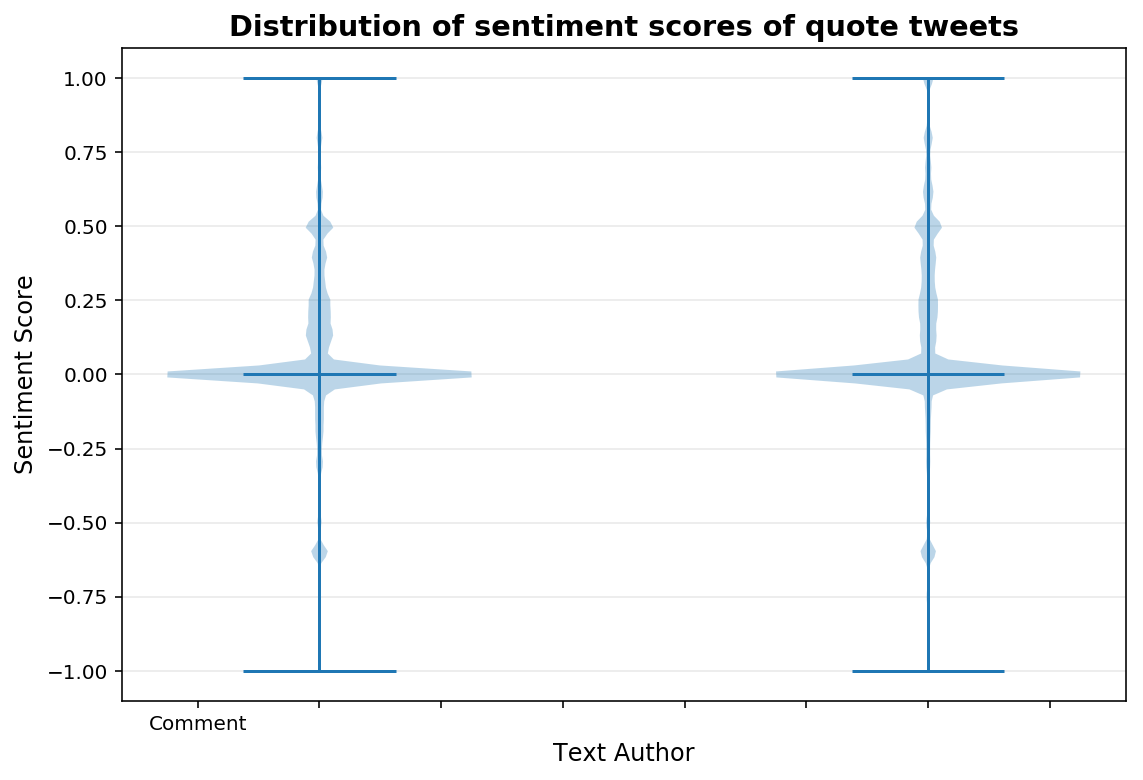

In [30]:
"""
DEPRECATED

Plot sentiment/ploarity scores of quote tweets (original/comment)
"""

qt_sent_fig = os.path.join(FIG_DIR, 'qt_sent.png')

if 0 == 1:
    '''
    Prepare data
    '''
    comment_scores = []
    original_scores = []
    
    data_lst = []
    with open(qt_sent_pkl, 'rb') as f:
        data_lst = pickle.load(f)
     
    for doc in data_lst:
        # sentiment scores for quote comments
        comment_scores.append(doc['X_text_polarity'])
        # sentiment scores for original tweets
        original_scores.append(doc['X_qt_text_polarity'])
    
    data = [original_scores, comment_scores]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    ax.violinplot(data, showmedians=True)
#     plt.setp(bp['boxes'], color='black')
#     plt.setp(bp['whiskers'], color='black')
#     plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['Original tweet', 'Comment'])
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Distribution of sentiment scores of quote tweets', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Text Author', fontdict=label_fontdict)
    ax.set_ylabel('Sentiment Score', fontdict=label_fontdict)
    #ax.set_yscale('log')
        
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
#     for line in bp['medians']:
#         # get position data for median line
#         x, y = line.get_xydata()[1] # right point of median line
#         # overlay median value
#         ax.text(x, y, ' {:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(qt_sent_fig, dpi=200)

## Plot user influence by quote/native tweets

In [2]:
if 1 == 1:
    df = pd.read_pickle(SIMPLE_INFLUENCE_PKL)

In [3]:
df.shape

(609799, 10)

In [4]:
df = df.fillna(0)

In [5]:
df_qt = df[df['q_n'] > 0]
df_qt = df_qt[df_qt['nr_n'] > 0]

In [7]:
df_qt.head(5)

,uid,fo,n_n,n_src,q_n,q_src,p_n,p_src,nr_n,nr_src
14,767,124980,32,1510,1.0,12.0,0.0,0.0,31.0,1498.0
30,1081,358522,3,17,1.0,5.0,1.0,0.0,1.0,12.0
36,1168,4106,17,39,4.0,11.0,5.0,6.0,8.0,22.0
37,1186,92642,9,68,3.0,9.0,3.0,1.0,3.0,58.0
40,1378,18030,8,7,1.0,0.0,0.0,0.0,7.0,7.0


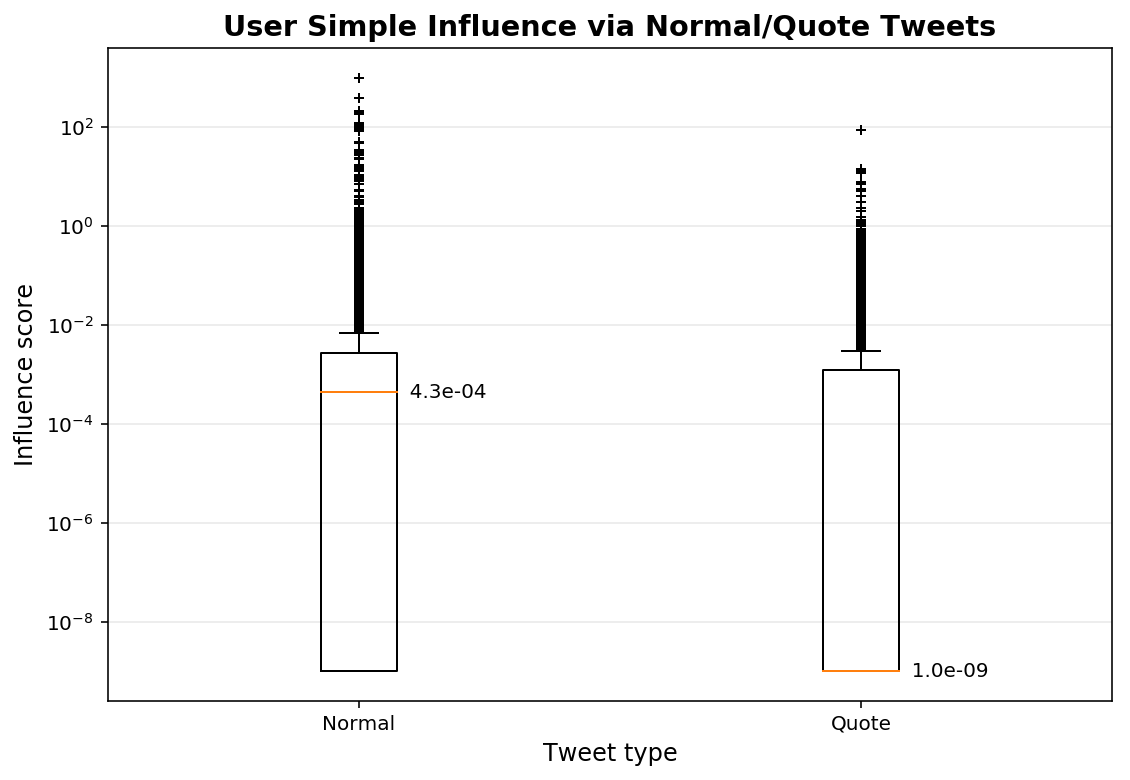

In [22]:
"""
Plot simple influence for users by quote/normal tweets
"""

simple_influence_qt_nr_fig = os.path.join(FIG_DIR, 'simple_influence_qt_nr_.png')

if 1 == 1:
    '''
    Prepare data
    '''
    # quote tweets
    qt_norm_s = df_qt['fo'] * df_qt['q_n']
    qt_norm_s = qt_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    qt_simple_influence = df_qt['q_src'] / qt_norm_s
    
    # normal tweets
    nr_norm_s = df_qt['fo'] * df_qt['nr_n']
    nr_norm_s = nr_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    nr_simple_influence = df_qt['nr_src'] / nr_norm_s
    
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    qt_simple_influence[qt_simple_influence < 1e-9] = 1e-9
    nr_simple_influence[nr_simple_influence < 1e-9] = 1e-9
    
    data = [nr_simple_influence, qt_simple_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['Normal', 'Quote'])
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('User Simple Influence via Normal/Quote Tweets', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Tweet type', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
        
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, ' {:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(simple_influence_qt_nr_fig, dpi=200)

## Plot user influence by differnet sentiments in quote tweets

### Build pickles

In [2]:
"""
Declare 4 tmp pickles
"""

'''
Pickle for all quote tweets grouped by 'user.id'
'''
qt_influence_all_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'qt_influence_all.lst.pkl')) 

'''
Pickle for only quote tweets with POSITIVE SENTIMENT grouped by 'user.id'
'''
qt_influence_pos_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'qt_influence_pos.lst.pkl'))

'''
Pickle for only quote tweets with NEUTRAL SENTIMENT grouped by 'user.id'
'''
qt_influence_neu_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'qt_influence_neu.lst.pkl'))

'''
Pickle for only quote tweets with NEGTIVE SENTIMENT grouped by 'user.id'
'''
qt_influence_neg_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'qt_influence_neg.lst.pkl'))

In [11]:
"""
Make qt_influence_all_pkl
"""
if 0 == 1:
    print('Making pickle from database...')
    data_lst = []
    
    # query on all quote tweets
    group_dict = {'$group': {'_id': '$user_id', # user's id
                             'followers_count': {'$first': '$user_followers_count'}, # number of followers the user has
                             'qt_num': {'$sum': 1}, # total number of quote tweets belongs to the user
                             'qt_sum_retweet_count': {'$sum': '$retweet_count'} # sum of retweet_count of all quote tweets belong to the user
                             }}
    
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'qt_num': 1,
                                 'qt_sum_retweet_count': 1}}
    
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TW_NT_QT_SENT_COL))
    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    cursor = tw_nt_qt_sent_col.aggregate(pipeline=ppl_lst,
                                         allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    for doc in cursor:
        data_lst.append(doc)
        
    with open(qt_influence_all_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

Making pickle from database...
Aggreating on collection "tw_nt_qt_sent"
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Done


In [12]:
"""
Make qt_influence_pos_pkl
"""
if 0 == 1:
    print('Making pickle from database...')
    data_lst = []
    
    # query on quote tweets with POSITIVE sentiment
    # {'$gt': 0.33}
    # {'$gte': -0.33, '$lte': 0.33}
    # {'$lt': -0.33}
    match_dict = {'$match': {'X_text_polarity': {'$gt': 0.33}}}
    
    group_dict = {'$group': {'_id': '$user_id', # user's id
                             'followers_count': {'$first': '$user_followers_count'}, # number of followers the user has
                             'qt_pos_num': {'$sum': 1}, # total number of quote tweets belongs to the user
                             'qt_pos_sum_retweet_count': {'$sum': '$retweet_count'} # sum of retweet_count of all quote tweets belong to the user
                             }}
    
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'qt_pos_num': 1,
                                 'qt_pos_sum_retweet_count': 1}}
    
    ppl_lst = [match_dict, group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TW_NT_QT_SENT_COL))
    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    cursor = tw_nt_qt_sent_col.aggregate(pipeline=ppl_lst,
                                         allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    for doc in cursor:
        data_lst.append(doc)
        
    with open(qt_influence_pos_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

Making pickle from database...
Aggreating on collection "tw_nt_qt_sent"
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Done


In [13]:
"""
Make qt_influence_neu_pkl
"""
if 0 == 1:
    print('Making pickle from database...')
    data_lst = []
    
    # query on quote tweets with POSITIVE sentiment
    # {'$gt': 0.33}
    # {'$gte': -0.33, '$lte': 0.33}
    # {'$lt': -0.33}
    match_dict = {'$match': {'X_text_polarity': {'$gte': -0.33, '$lte': 0.33}}}
    
    group_dict = {'$group': {'_id': '$user_id', # user's id
                             'followers_count': {'$first': '$user_followers_count'}, # number of followers the user has
                             'qt_neu_num': {'$sum': 1}, # total number of quote tweets belongs to the user
                             'qt_neu_sum_retweet_count': {'$sum': '$retweet_count'} # sum of retweet_count of all quote tweets belong to the user
                             }}
    
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'qt_neu_num': 1,
                                 'qt_neu_sum_retweet_count': 1}}
    
    ppl_lst = [match_dict, group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TW_NT_QT_SENT_COL))
    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    cursor = tw_nt_qt_sent_col.aggregate(pipeline=ppl_lst,
                                         allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    for doc in cursor:
        data_lst.append(doc)
        
    with open(qt_influence_neu_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

Making pickle from database...
Aggreating on collection "tw_nt_qt_sent"
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Done


In [14]:
"""
Make qt_influence_neg_pkl
"""
if 0 == 1:
    print('Making pickle from database...')
    data_lst = []
    
    # query on quote tweets with POSITIVE sentiment
    # {'$gt': 0.33}
    # {'$gte': -0.33, '$lte': 0.33}
    # {'$lt': -0.33}
    match_dict = {'$match': {'X_text_polarity': {'$lt': -0.33}}}
    
    group_dict = {'$group': {'_id': '$user_id', # user's id
                             'followers_count': {'$first': '$user_followers_count'}, # number of followers the user has
                             'qt_neg_num': {'$sum': 1}, # total number of quote tweets belongs to the user
                             'qt_neg_sum_retweet_count': {'$sum': '$retweet_count'} # sum of retweet_count of all quote tweets belong to the user
                             }}
    
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'qt_neg_num': 1,
                                 'qt_neg_sum_retweet_count': 1}}
    
    ppl_lst = [match_dict, group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TW_NT_QT_SENT_COL))
    tw_nt_qt_sent_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_NT_QT_SENT_COL)
    cursor = tw_nt_qt_sent_col.aggregate(pipeline=ppl_lst,
                                         allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    for doc in cursor:
        data_lst.append(doc)
        
    with open(qt_influence_neg_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

Making pickle from database...
Aggreating on collection "tw_nt_qt_sent"
MongoDB on localhost:27017/tweets_ek-2.tw_nt_qt_sent connected successfully!
Done


In [15]:
"""
Read in tmp pickles, pass to dfs, merge dfs, and pickle result large df to data dir

Make a global pickle file
Register in config:
    QT_SENY_INFLUENCE_PKL = os.path.join(DATA_DIR, 'qt_sent_influence.df.pkl')
"""
if 0 == 1:
    data_lst = []
    with open(qt_influence_all_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'followers_count', 'qt_num', 'qt_sum_retweet_count']
    df_all = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    del data_lst
    
    data_lst = []
    with open(qt_influence_pos_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'qt_pos_num', 'qt_pos_sum_retweet_count']
    df_pos = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    del data_lst
    
    data_lst = []
    with open(qt_influence_neu_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'qt_neu_num', 'qt_neu_sum_retweet_count']
    df_neu = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    del data_lst
    
    data_lst = []
    with open(qt_influence_neg_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'qt_neg_num', 'qt_neg_sum_retweet_count']
    df_neg = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    del data_lst
    
    df = pd.merge(df_all, df_pos, on='user_id', how='left')
    df = pd.merge(df, df_neu, on='user_id', how='left')
    df = pd.merge(df, df_neg, on='user_id', how='left')

    column_names = {'user_id': 'uid',
                    'followers_count': 'fo',
                    'qt_num': 'qt_n',
                    'qt_sum_retweet_count': 'qt_src',
                    'qt_pos_num': 'qt_pos_n',
                    'qt_pos_sum_retweet_count': 'qt_pos_src',
                    'qt_neu_num': 'qt_neu_n',
                    'qt_neu_sum_retweet_count': 'qt_neu_src',
                    'qt_neg_num': 'qt_neg_n',
                    'qt_neg_sum_retweet_count': 'qt_neg_src'
                   }
    df = df.rename(columns=column_names)
    
    '''
    Use pandas built-in pickle function
    '''
    df.to_pickle(QT_SENY_INFLUENCE_PKL)
    
    print('Done')

Done


### Plot

In [16]:
if 1 == 1:
    df = pd.read_pickle(QT_SENY_INFLUENCE_PKL)

In [18]:
df.shape

(146622, 10)

In [19]:
df = df.fillna(0)

In [20]:
df.head(3)

,uid,fo,qt_n,qt_src,qt_pos_n,qt_pos_src,qt_neu_n,qt_neu_src,qt_neg_n,qt_neg_src
0,26816731,1503,1,0,0.0,0.0,1.0,0.0,0.0,0.0
1,1542770546,997,1,0,0.0,0.0,1.0,0.0,0.0,0.0
2,15648685,102,1,0,0.0,0.0,1.0,0.0,0.0,0.0


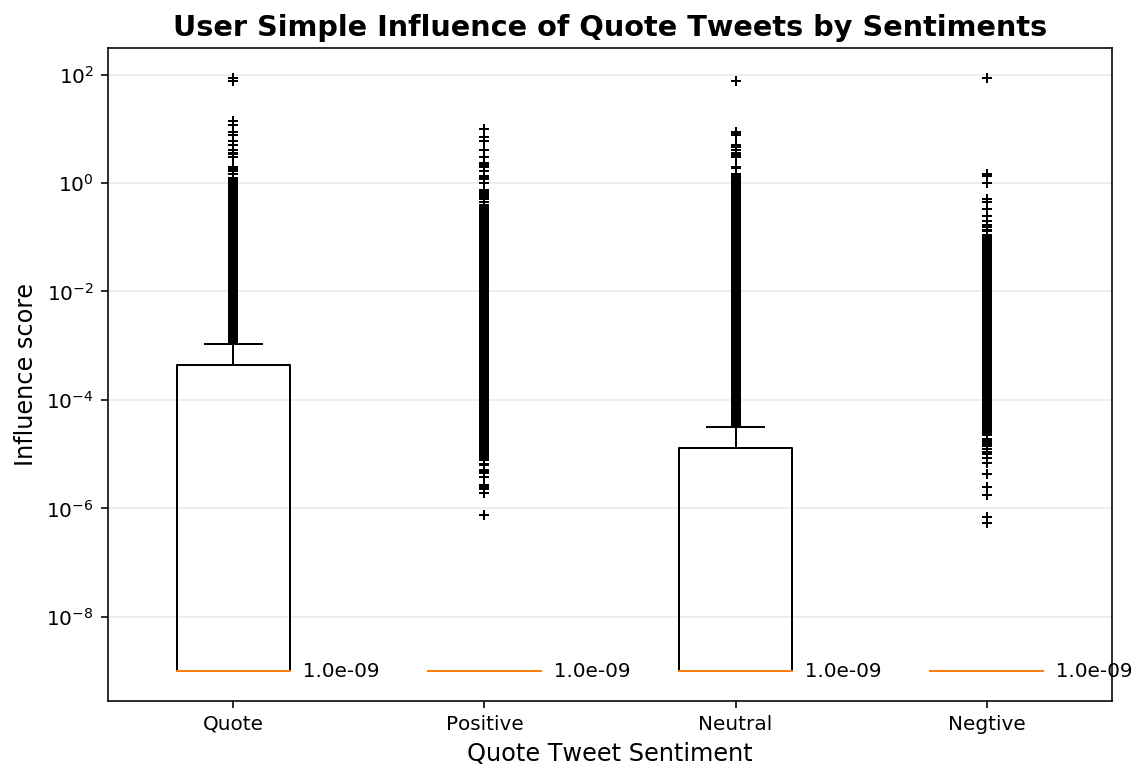

In [22]:
"""
Plot user influence by differnet sentiments in quote tweets
"""

qt_influence_sent_fig = os.path.join(FIG_DIR, 'qt_influence_sent.png')

if 1 == 1:
    '''
    Prepare data
    '''
    # all quote tweets
    qt_norm_s = df['fo'] * df['qt_n']
    qt_norm_s = qt_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    qt_influence = df['qt_src'] / qt_norm_s
    
    # quote tweets with POSITIVE SENTIMENT
    qt_pos_norm_s = df['fo'] * df['qt_pos_n']
    qt_pos_norm_s = qt_pos_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    qt_pos_influence = df['qt_pos_src'] / qt_pos_norm_s
    
    # quote tweets with NEUTRAL SENTIMENT
    qt_neu_norm_s = df['fo'] * df['qt_neu_n']
    qt_neu_norm_s = qt_neu_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    qt_neu_influence = df['qt_neu_src'] / qt_neu_norm_s

    # quote tweets with NEGTIVE SENTIMENT
    qt_neg_norm_s = df['fo'] * df['qt_neg_n']
    qt_neg_norm_s = qt_neg_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    qt_neg_influence = df['qt_neg_src'] / qt_neg_norm_s

    
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    qt_influence[qt_influence < 1e-9] = 1e-9
    qt_pos_influence[qt_pos_influence < 1e-9] = 1e-9
    qt_neu_influence[qt_neu_influence < 1e-9] = 1e-9
    qt_neg_influence[qt_neg_influence < 1e-9] = 1e-9
    
    data = [qt_influence, qt_pos_influence, qt_neu_influence, qt_neg_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['Quote', 'Positive', 'Neutral', 'Negtive'])
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('User Simple Influence of Quote Tweets by Sentiments', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Quote Tweet Sentiment', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
        
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, ' {:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(qt_influence_sent_fig, dpi=200)